# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [3]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import requests
from bs4 import BeautifulSoup

#importar la web HTML

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
request = requests.get(url, headers = headers)
html_data = request.text

soup = BeautifulSoup(html_data, "html.parser")

soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<link href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue" media="only screen and (max-width: 768px)" rel="alternate"/>
<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Reve

# Buscar todas las tablas.
# Encontrar la tabla con la evolución trimestral.
# Almacena los datos en un DataFrame.

In [5]:
tables_trimestrales = soup.find_all("table")
tables_trimestrales

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [66]:
import pandas as pd

for index, table in enumerate (tables_trimestrales):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
        break

tesla_dinerito = pd.DataFrame(columns = ["Fecha", "Revenue"])
for row in tables_trimestrales[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace(" $", "").replace(",", "")
        tesla_dinerito = pd.concat([tesla_dinerito, pd.DataFrame({
            "Fecha": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index= True)

tesla_dinerito.head()

,Fecha,Revenue
0,2024-09-30,$25182
1,2024-06-30,$25500
2,2024-03-31,$21301
3,2023-12-31,$25167
4,2023-09-30,$23350


In [23]:
import sqlite3

connection = sqlite3.connect("Tesla.db")

cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Fecha, Revenue)""")

OperationalError: table revenue already exists

In [65]:
tesla_tuples = list(tesla_dinerito.to_records(index = False))
tesla_tuples[:5]

[np.record(('2024-09-30', '25182'), dtype=[('Fecha', 'O'), ('Revenue', 'O')]),
 np.record(('2024-06-30', '25500'), dtype=[('Fecha', 'O'), ('Revenue', 'O')]),
 np.record(('2024-03-31', '21301'), dtype=[('Fecha', 'O'), ('Revenue', 'O')]),
 np.record(('2023-12-31', '25167'), dtype=[('Fecha', 'O'), ('Revenue', 'O')]),
 np.record(('2023-09-30', '23350'), dtype=[('Fecha', 'O'), ('Revenue', 'O')])]

In [25]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

In [26]:
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('2024-09-30', '25182')
('2024-06-30', '25500')
('2024-03-31', '21301')
('2023-12-31', '25167')
('2023-09-30', '23350')
('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('

### - Visualización de datos

In [68]:
datos_filtrados = tesla_dinerito.dropna()

datos_filtrados

,Fecha,Revenue
0,2024-09-30,$25182
1,2024-06-30,$25500
2,2024-03-31,$21301
3,2023-12-31,$25167
4,2023-09-30,$23350
...,...,...
57,2010-06-30,$28
58,2010-03-31,$21
59,2009-12-31,
60,2009-09-30,$46


TypeError: datetime64 type does not support sum operations

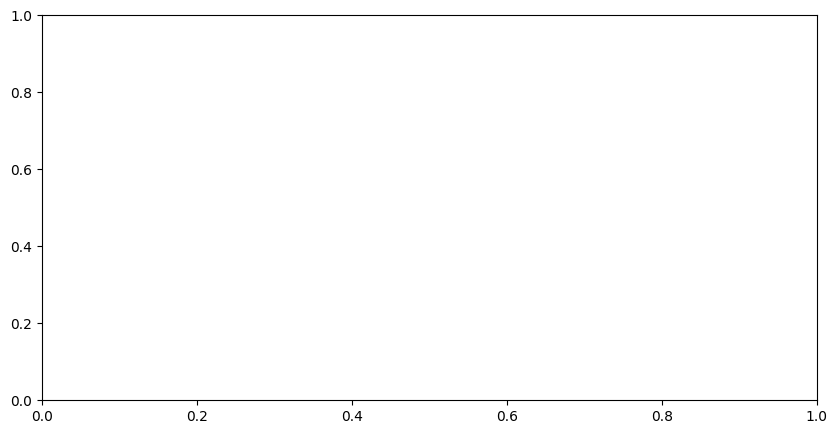

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

tesla_dinerito["Fecha"] = pd.to_datetime(tesla_dinerito["Fecha"])
tesla_revenue_yearly = tesla_dinerito.groupby(tesla_dinerito["Fecha"].dt.year).sum()
sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Fecha"] < 2023], x = "Fecha", y = "Revenue")

plt.tight_layout()

plt.show()

In [69]:
tesla_dinerito.dtypes

Fecha      datetime64[ns]
Revenue            object
dtype: object

In [16]:
tesla_dinerito

,Fecha,Revenue
0,2024-09-30,25182
1,2024-06-30,25500
2,2024-03-31,21301
3,2023-12-31,25167
4,2023-09-30,23350
...,...,...
57,2010-06-30,28
58,2010-03-31,21
59,2009-12-31,
60,2009-09-30,46


In [15]:
tesla_dinerito.groupby(tesla_dinerito["Fecha"].dt.year).sum(numeric_only=True)


""
Fecha
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [ ]:
tesla_revenue_yearly.columns

AttributeError: 'Series' object has no attribute 'columns'